## ** Correlation Matrix (Numeric → Numeric)

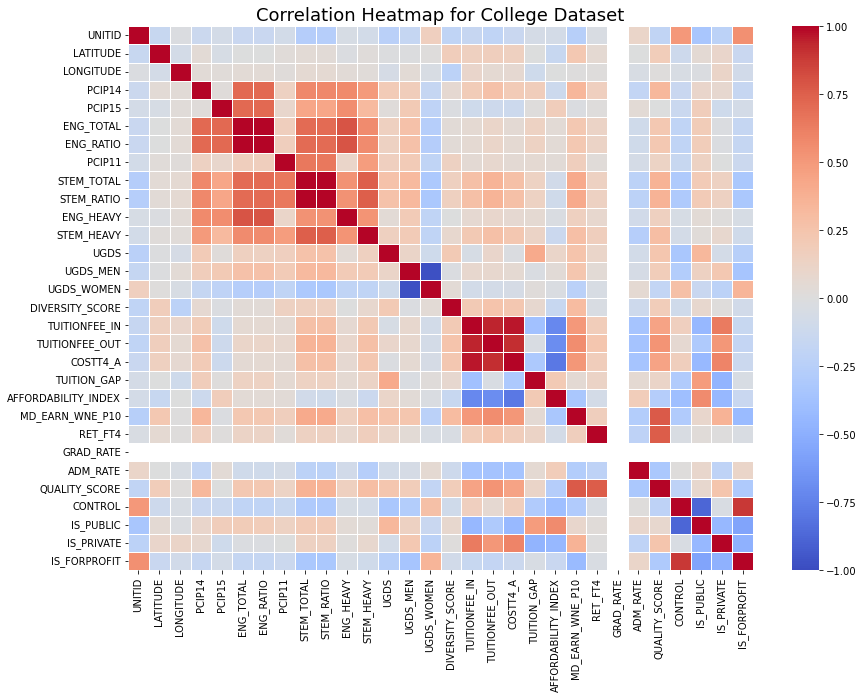

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("institute_most_recent_processed.csv")



plt.figure(figsize=(14, 10))

corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,
    linewidths=0.5,
    vmin=-1, vmax=1
)

plt.title("Correlation Heatmap for College Dataset", fontsize=18)
plt.show()


In [2]:
print(df.corr(numeric_only=True).round(3))

                     UNITID  LATITUDE  LONGITUDE  PCIP14  PCIP15  ENG_TOTAL  \
UNITID                1.000    -0.153     -0.016  -0.128  -0.077     -0.143   
LATITUDE             -0.153     1.000     -0.076   0.045  -0.053     -0.006   
LONGITUDE            -0.016    -0.076      1.000   0.038   0.027      0.045   
PCIP14               -0.128     0.045      0.038   1.000   0.022      0.714   
PCIP15               -0.077    -0.053      0.027   0.022   1.000      0.716   
ENG_TOTAL            -0.143    -0.006      0.045   0.714   0.716      1.000   
ENG_RATIO            -0.141    -0.007      0.045   0.713   0.716      1.000   
PCIP11               -0.081     0.027      0.016   0.148   0.089      0.165   
STEM_TOTAL           -0.267     0.040      0.056   0.581   0.431      0.707   
STEM_RATIO           -0.264     0.038      0.056   0.581   0.430      0.707   
ENG_HEAVY            -0.048    -0.022      0.037   0.576   0.555      0.792   
STEM_HEAVY           -0.083     0.016      0.030   0

## Sorted block heatmap (by STEM/ENG and outcome)
If you know “logical” groups, sort them to reveal blocks

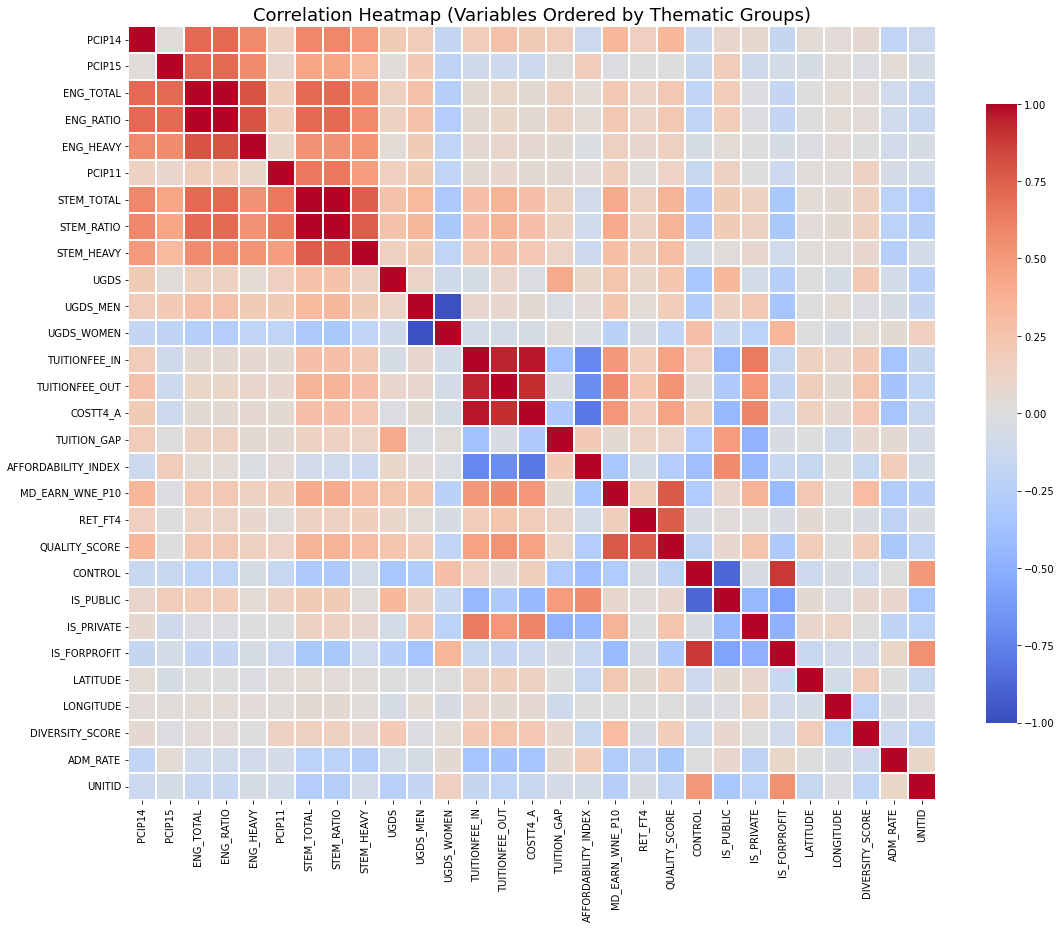

In [3]:
# Example semantic groups – adjust as needed
eng_vars   = ["PCIP14", "PCIP15", "ENG_TOTAL", "ENG_RATIO", "ENG_HEAVY"]
stem_vars  = ["PCIP11", "STEM_TOTAL", "STEM_RATIO", "STEM_HEAVY"]
size_vars  = ["UGDS", "UGDS_MEN", "UGDS_WOMEN"]
price_vars = ["TUITIONFEE_IN", "TUITIONFEE_OUT", "COSTT4_A", "TUITION_GAP", "AFFORDABILITY_INDEX"]
outcome_vars = ["MD_EARN_WNE_P10", "RET_FT4", "QUALITY_SCORE"]
control_vars = ["CONTROL", "IS_PUBLIC", "IS_PRIVATE", "IS_FORPROFIT"]
geo_vars   = ["LATITUDE", "LONGITUDE"]
misc_vars  = ["DIVERSITY_SCORE", "ADM_RATE", "UNITID"]

ordered = eng_vars + stem_vars + size_vars + price_vars + outcome_vars + control_vars + geo_vars + misc_vars
ordered = [v for v in ordered if v in corr.columns]  # keep only existing

corr_ord = corr.loc[ordered, ordered]

plt.figure(figsize=(16, 13))
sns.heatmap(
    corr_ord,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.3,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Variables Ordered by Thematic Groups)", fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Correlation with a target: e.g., QUALITY_SCORE
Focus on which variables relate most strongly to one outcome.

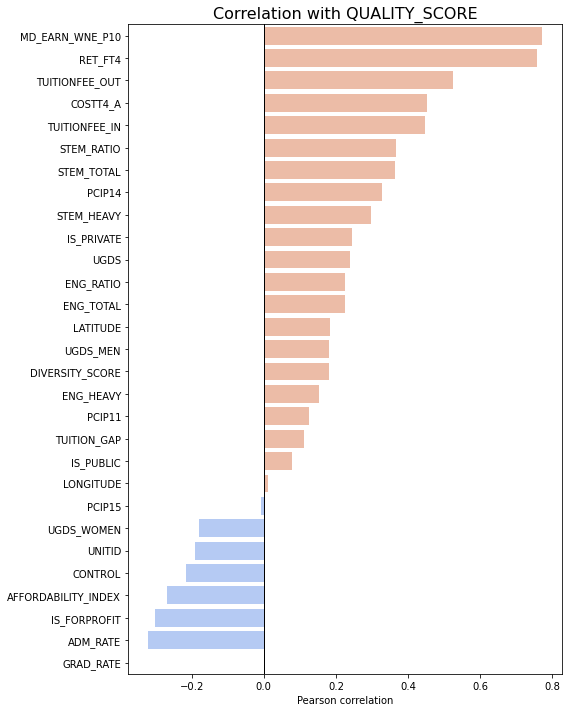

In [4]:
target = "QUALITY_SCORE"

corr_target = corr[target].drop(target).sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index,
    palette="coolwarm",
    hue=corr_target.values > 0,
    dodge=False,
    legend=False
)
plt.axvline(0, color="black", linewidth=1)
plt.title(f"Correlation with {target}", fontsize=16)
plt.xlabel("Pearson correlation")
plt.ylabel("")
plt.tight_layout()
plt.show()


## Correlation with a target: e.g., COSTT4_A
Focus on which variables relate most strongly to one outcome.

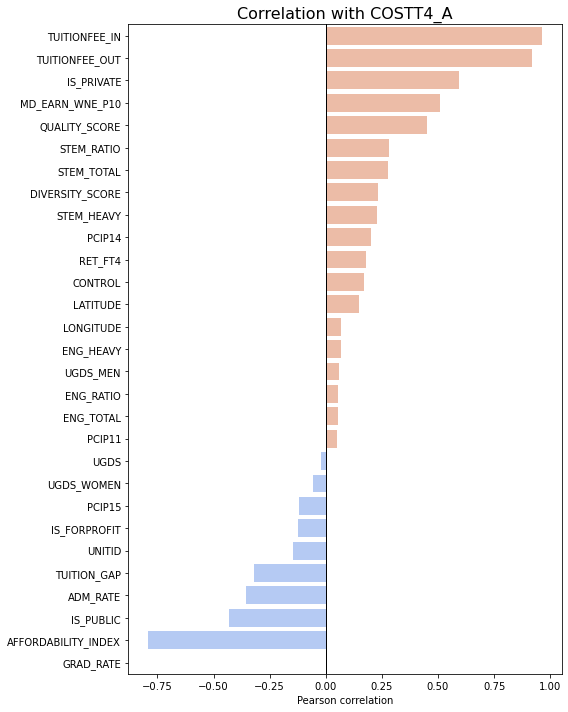

In [5]:
target = "COSTT4_A"

corr_target = corr[target].drop(target).sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index,
    palette="coolwarm",
    hue=corr_target.values > 0,
    dodge=False,
    legend=False
)
plt.axvline(0, color="black", linewidth=1)
plt.title(f"Correlation with {target}", fontsize=16)
plt.xlabel("Pearson correlation")
plt.ylabel("")
plt.tight_layout()
plt.show()


## Correlation with a target: e.g., MD_EARN_WNE_P10
Focus on which variables relate most strongly to one outcome.

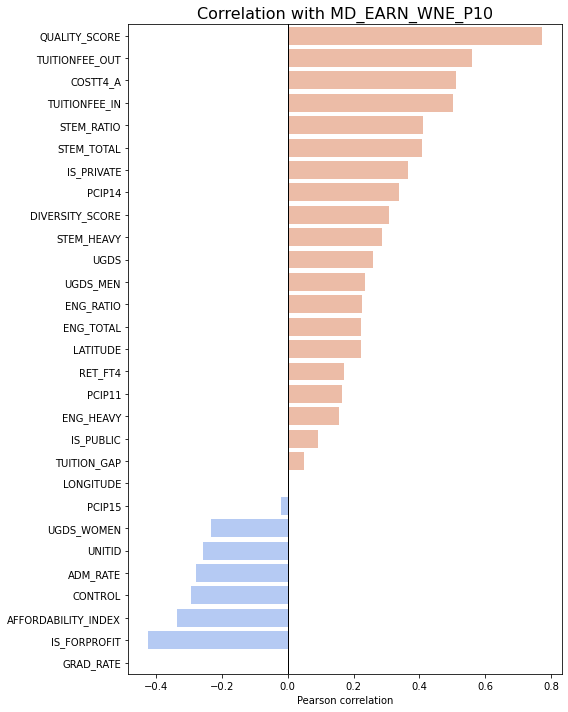

In [6]:
target = "MD_EARN_WNE_P10"

corr_target = corr[target].drop(target).sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index,
    palette="coolwarm",
    hue=corr_target.values > 0,
    dodge=False,
    legend=False
)
plt.axvline(0, color="black", linewidth=1)
plt.title(f"Correlation with {target}", fontsize=16)
plt.xlabel("Pearson correlation")
plt.ylabel("")
plt.tight_layout()
plt.show()


## ** Distribution Plots for Key Features